# Confidence intervals
As always let's start by importing our usual libraries 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1. Let's collect some data



Let's collect some data. 

In [4]:
data = pd.read_csv('coffee.csv')
population = data.coffee

# Calculate the population mean
population_mean = population.mean()

# print population data
print(population)
print("the population mean is:")
print(population_mean)

0      2.000000
1     21.000000
2     14.000000
3      4.000000
4      0.500000
5      0.200000
6      8.000000
7     16.000000
8      4.500000
9     10.000000
10     6.000000
11    15.000000
12    20.000000
13     7.333333
14    45.000000
15     0.000000
16     7.000000
17     9.000000
18    12.000000
19     7.330000
20     7.330000
21    20.000000
22     9.000000
23     4.500000
24    12.000000
25     5.000000
26     4.000000
27    10.000000
28    14.000000
29     4.000000
30    15.000000
31     9.000000
32    21.000000
33    14.000000
34     2.000000
35    15.000000
36    20.000000
37    10.000000
38     4.000000
39     0.000000
40    20.000000
41     5.000000
42    15.000000
43    21.000000
44     0.000000
45    10.000000
46     4.000000
47     2.000000
Name: coffee, dtype: float64
the population mean is:
10.118611111104167


In [5]:
samples = pd.read_csv('samples1.csv', header=0, index_col=0)
samples = samples.transpose()
samples.reset_index(drop=True, inplace=True)
samples

Participant ID,f3c892d088b5e7e6e76205081e5e1a7d1111968a,a27adbcf5181f3d2ecf1c5da936c2cb9e5a6aa94,fbc05b88a5cd2963c7d55d9533013833e2112a11,55870bc6334c9c7dda260283fb2ba56eeabc5ced,29a05a2b8ef87ca95120ea084f9b3cbe5cff343a,527115e2d5c644aa7f464189554b002f1291f5bc,5c6b5fb809dcccf096cf0a7a9858a69ee3092889,62183631e6201c894cf97c3cdab6c8bfa27085ca,f7b621c9bcef12025f8c132f23e75a93b723fc83,6d0ba19792e8b7e57de9a4bae4cd1048f6f3026b,34f7303956c0915009c4636c222d3258095ae404,7443da471aa268857d1683174ee33a64f1204c5e,ef315f90d1d16099f30b30ce760987ac703ac70b,5f2d4479071dd1b18243a8b83a549dec8636ee36,27e44afd234e6739e57a7fc4aa9205ea5e1048c8,3aa08af2c838898338dc3abac1f8dbfd84bf07e8,4f318e664e4813238163a2c0346ef42e8a1d883c,4b5b792235f33749f14a8153a34c93a79f8306ce
0,14.0,12.0,4.0,9.0,20.0,7.33,14.0,12.0,10.0,12.0,5.0,9.0,4.5,15.0,9.0,10.0,4.0,7.33
1,0.0,10.0,10.0,20.0,9.0,4.00,4.0,10.0,14.0,4.0,2.0,0.0,21.0,4.0,14.0,4.0,15.0,10.00
2,21.0,0.0,0.0,0.0,4.0,20.00,2.0,4.0,0.0,0.0,15.0,5.0,15.0,10.0,4.0,4.0,4.0,15.00


In [6]:
samples.drop(samples.columns[0], axis=1, inplace=True)
samples = samples.astype(float)
# rename columns to sample1, sample2, ..., sampleN
new_names = [f"sample{i+1}" for i in range(samples.shape[1])]
samples.columns = new_names

# 2. Describe the data collected

After collecting some data, we can run some descriptive statistics that describe our sample. 

Descriptive statistics, as the name suggests, _describe_ the data. I.e., we are not making any guesses or estimates.

Common descriptive statistics that describe the center of a distribution:
- mean
- median 
- ...

and statistics decsribing the spread or dispersion of the distribution: 
- standard deviation
- range 
- variance

Text(0.5, 1.0, 'The samples distribution')

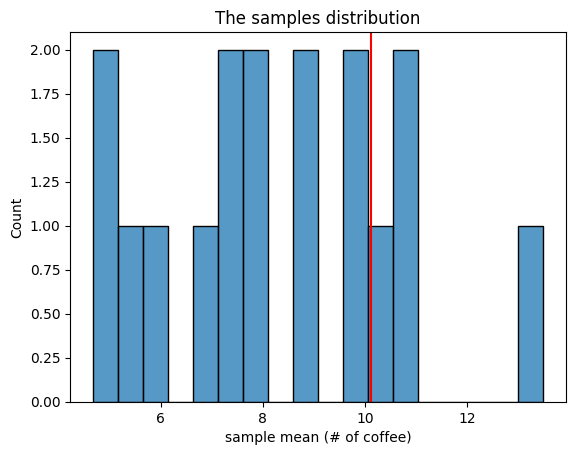

In [7]:
fig = sns.histplot(samples.mean(), binwidth=0.5)
plt.axvline(population_mean, 0,15, color='red')
plt.xlabel('sample mean (# of coffee)')
plt.ylabel('Count')
plt.title('The samples distribution')

Descriptive statistics describe our **sample**, i.e. the limited data that we collected. 

In the coffee data example, your sample is the few people you "interviewed". 

However, due to randomness, you could have collected a different sample from the same population of interest (e.g. your class).

### The problem
Which research statement is more useful:

In [8]:
print(f"1. Joe, Atin and Freya drink an average of {population_mean:.2} cups of coffee a day")
print(f"2. LIS students drink an average of {population_mean:.2} cups of coffee a day")

1. Joe, Atin and Freya drink an average of 1e+01 cups of coffee a day
2. LIS students drink an average of 1e+01 cups of coffee a day



You likely agree with me that the second statement is more scientifically valuable because it is more general than the first statement (even though both might be equally accurate!). Very rarely researchers want to say something about the specific sample they collect. More commonly, they want to say something about the population that sample was taken from. 

This is why on pundits and political polls you hear general statements like "British people think that bla bla bla..." rather than specific ones like "these 100 people we interviewed think that bla bla bla..."

# 3. Extrapolate to the population

How can we make generalisations to the a larger population than the people we did not survey?

### The sampling distribution

In [9]:
means = []
for s in range(10000):
  # collect a sample of 3
  sample = np.random.choice(population, 3)
  # compute the sample mean
  means.append(np.mean(sample))

Text(0, 0.5, 'Count')

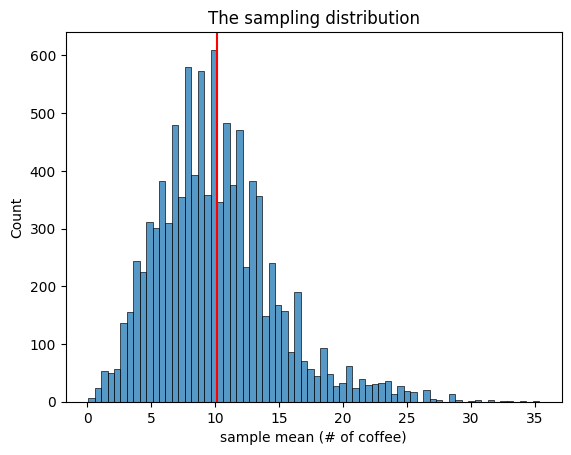

In [10]:
fig = sns.histplot(means)
plt.axvline(population_mean, color='red')
plt.title("The sampling distribution")
plt.xlabel('sample mean (# of coffee)')
plt.ylabel('Count')

## Calculate SE
If you had 10000 samples, calculating the standard deviation of the sampling distribution would be easy. However, in the real world, it is impractical to run the same experiment 100000 times and collect so many samples. 

The Central Limit Theorem allows us to infer the standard deviation of the sampling distribution ($\sigma$) by knowing only the sample size ($N$) and the standard deviation of the the sample ($s$). 
## $\sigma_{\bar{X}} = \frac{s}{\sqrt{N}}$

# Confidence intervals
Remember the definition of a confidence interval:

>A 95% CI is a random interval which contains the population parameter being estimated (e.g., the mean) 95% of the time if the estimate were repeated for numerous samples.​


### a) calculate Confidence Intervals

## $CI_{[Lower, Upper]} = \bar{x} \pm 1.96 * SE$

In [11]:
def confidence_intervals(sample):
    # Calculate the sample mean
    sample_mean = sample.mean()
    # Calculate the sample standard deviation
    sample_std = sample.std()
    #Calculate the sample size
    sample_size = len(sample)

    #standard error (approximation)
    SE = sample_std / np.sqrt(sample_size)

    # Calculate the lower and upper confidence limits
    lower_bound = sample_mean - (1.96 * SE)
    upper_bound = sample_mean + (1.96 * SE)

    return lower_bound, upper_bound

### b) draw 100 samples

In [12]:
CIs = []
for s in range(100):
  # collect a sample of 50 observations
  sample = np.random.choice(population, 50)
  # compute the sample mean
  CIs.append(confidence_intervals(sample))

### c) plot the intervals

7


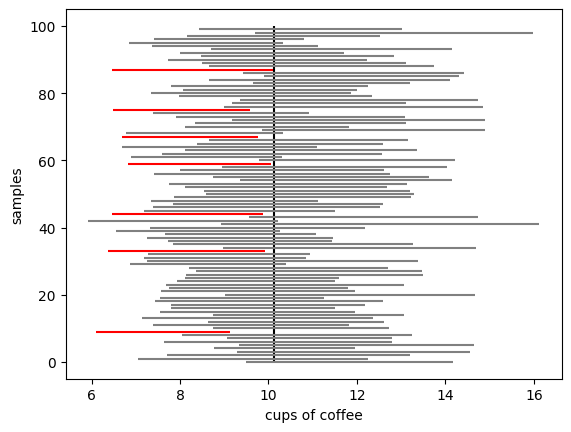

In [13]:
# plot a vertical line for the population mean
plt.vlines(population_mean, 0,100, color='black')
c=0
for s in range(len(CIs)):
  if CIs[s][0]>population_mean or CIs[s][1]<population_mean:
    # plot the sample's confidence interval in red
    plt.hlines(s, CIs[s][0],CIs[s][1], color='red')
    c+=1
  else:
    # plot the sample's confidence interval in blue
    plt.hlines(s, CIs[s][0],CIs[s][1], color='gray')


plt.xlabel('cups of coffee')
plt.ylabel('samples')

print(c)